In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('compas-scores-two-years.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [23]:
print(df['age_cat'].unique())
print(df['sex'].unique())
print(df['race'].unique())
print(df['priors_count'].unique())
print(df['c_charge_degree'].unique())

use_df = df[['sex','age_cat','race',
            'juv_fel_count','juv_misd_count','juv_other_count','priors_count',
            'c_charge_degree', 'decile_score', 'v_decile_score', 'score_text', 'v_score_text', 'is_recid', 'is_violent_recid']]

print(use_df.shape)
print(use_df.columns)
print(use_df.head())
# print(use_df['race'].unique())

# Encode all categorical variables in one step
categorical_columns = ['sex', 'age_cat', 'c_charge_degree'] #, 'score_text', 'v_score_text']
encoded_df = pd.get_dummies(use_df, columns=categorical_columns, drop_first=True)

# Now encode race separately without dropping any category
encoded_df = pd.get_dummies(encoded_df, columns=['race'], drop_first=False)

# Create mapping dictionary for score encoding
score_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

encoded_df['score_text'] = encoded_df['score_text'].map(score_mapping)
encoded_df['v_score_text'] = encoded_df['v_score_text'].map(score_mapping)

print("\nShape after encoding:", encoded_df.shape)
print("\nNew columns after encoding:")
print(encoded_df.columns)
print("\nFirst few rows of encoded data:")
print(encoded_df.head())


['Greater than 45' '25 - 45' 'Less than 25']
['Male' 'Female']
['Other' 'African-American' 'Caucasian' 'Hispanic' 'Native American'
 'Asian']
[ 0  4  1  2 14  3  7  6  5 13  8  9 21 20 15 10 12 28 19 11 22 23 25 24
 36 18 16 33 17 30 27 38 26 37 29 35 31]
['F' 'M']
(7214, 14)
Index(['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'decile_score',
       'v_decile_score', 'score_text', 'v_score_text', 'is_recid',
       'is_violent_recid'],
      dtype='object')
    sex          age_cat              race  juv_fel_count  juv_misd_count  \
0  Male  Greater than 45             Other              0               0   
1  Male          25 - 45  African-American              0               0   
2  Male     Less than 25  African-American              0               0   
3  Male     Less than 25  African-American              0               1   
4  Male          25 - 45             Other              0               0   

C:\Users\fsd_n\AppData\Local\Temp\ipykernel_18032\1445386656.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


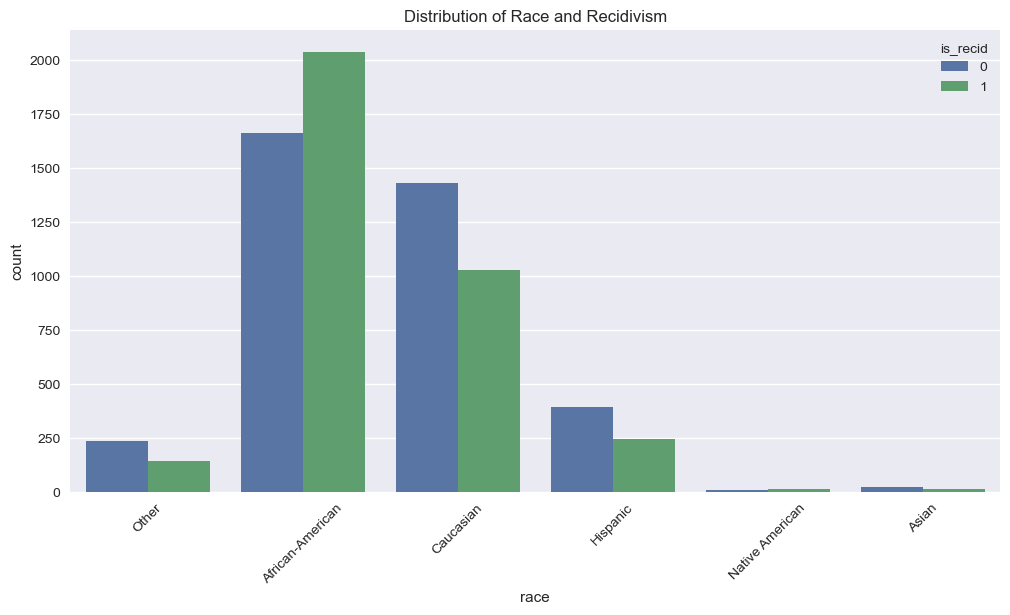

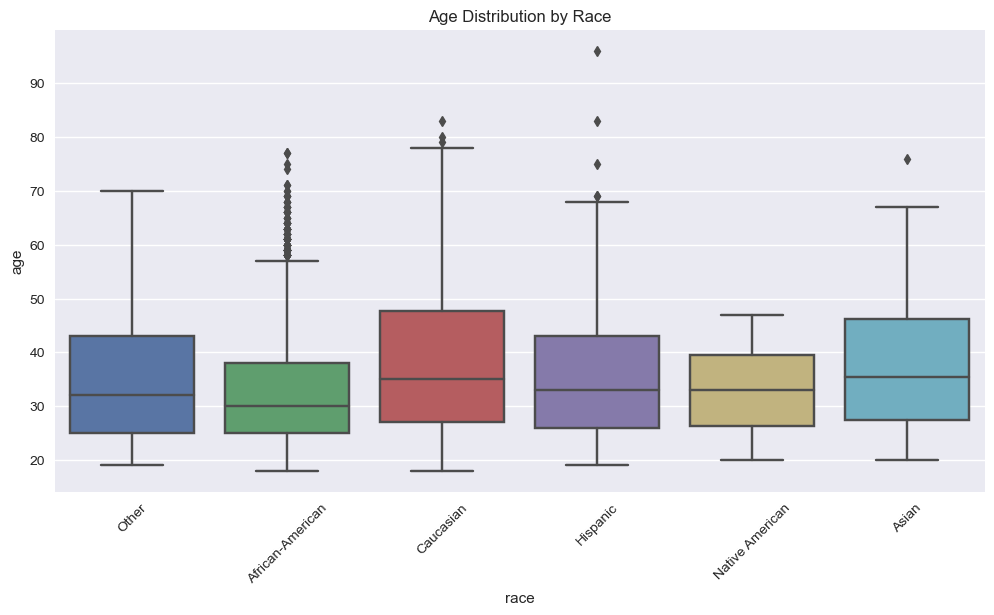

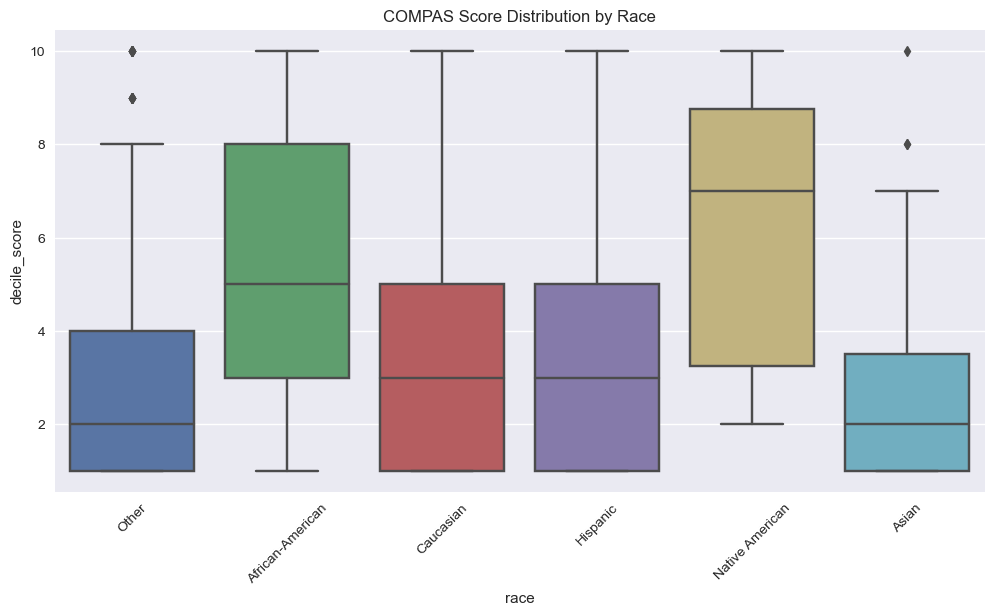

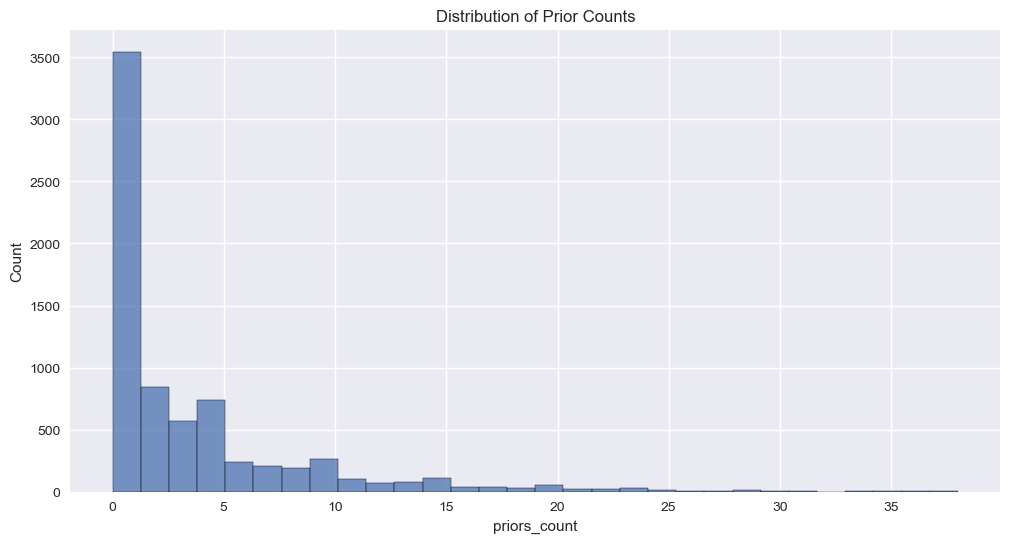

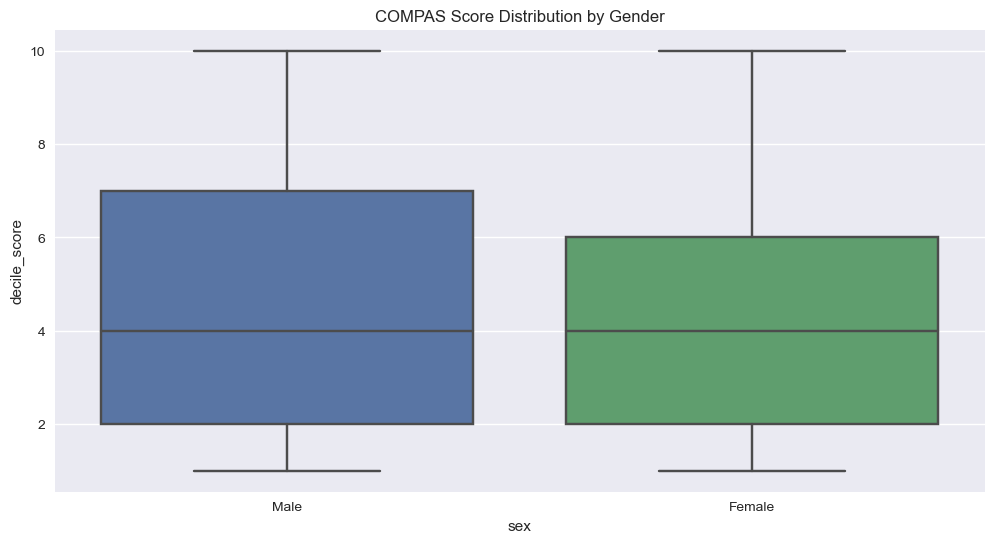

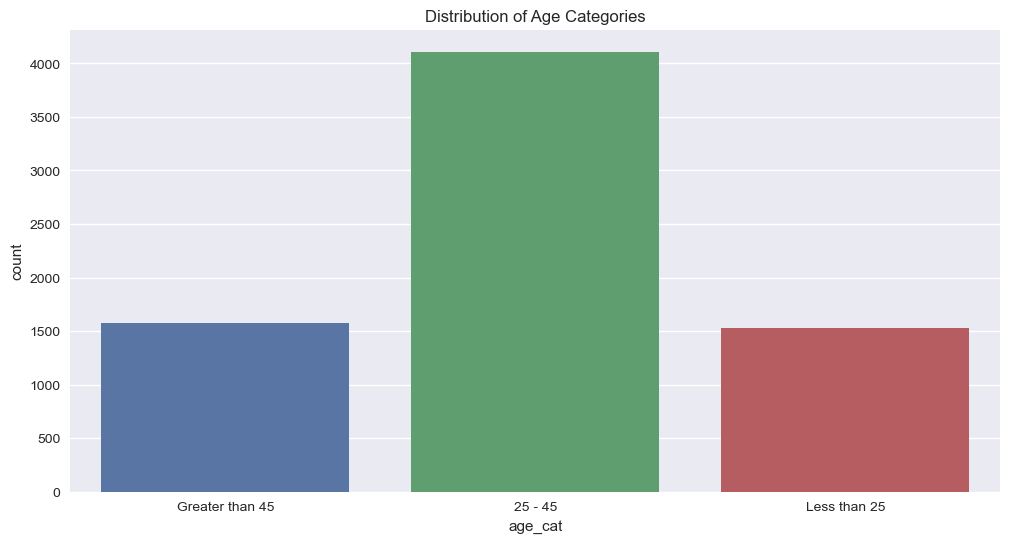

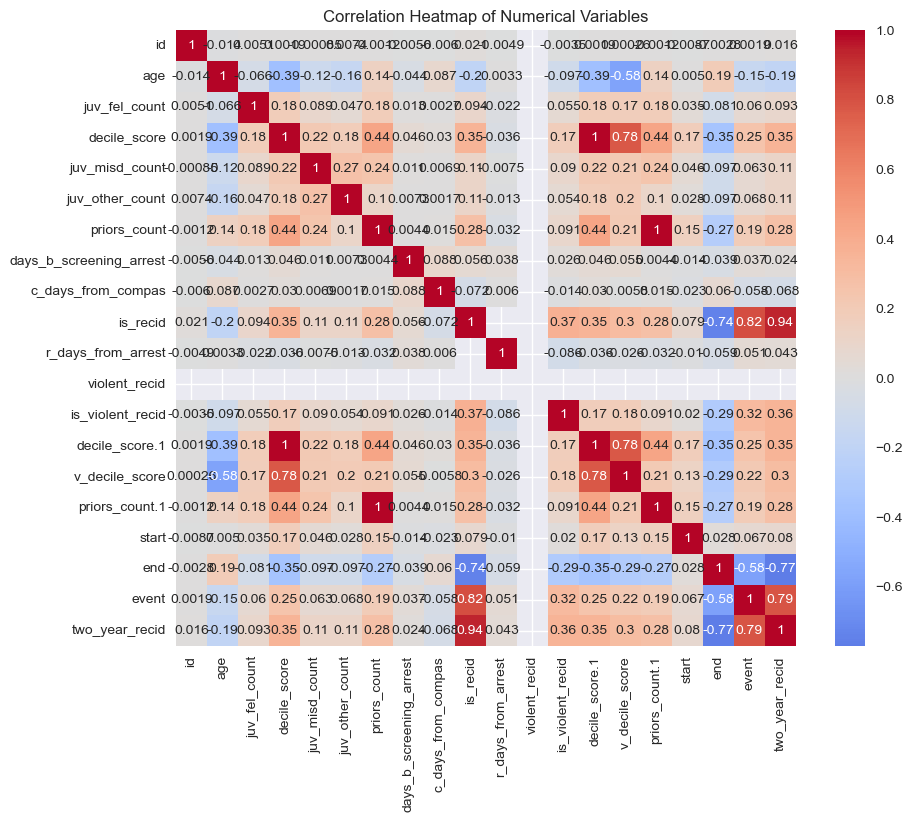

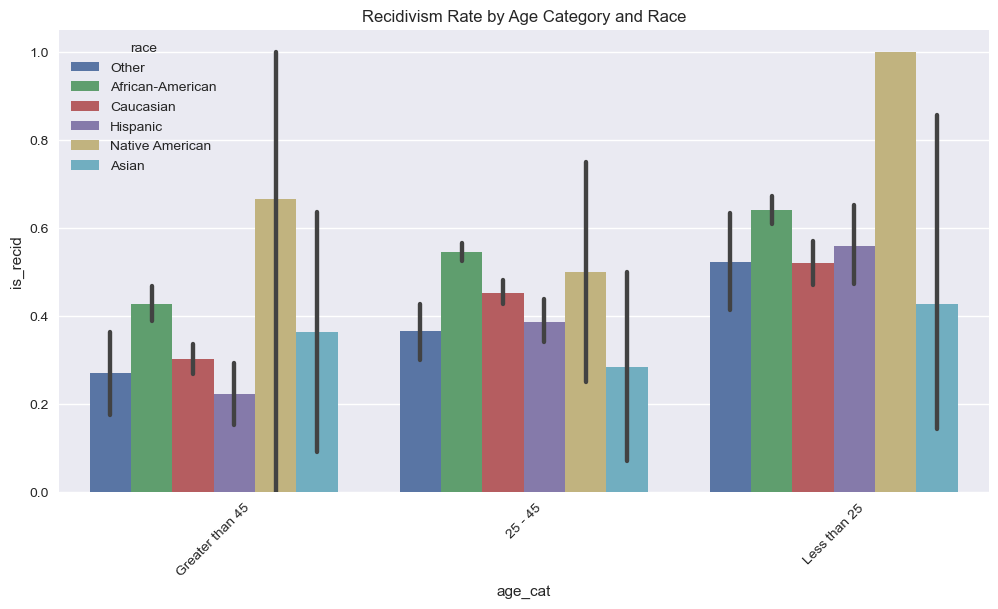

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
plt.style.use('seaborn')
fig_size = (12, 6)

# 1. Distribution of Race and Recidivism
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='race', hue='is_recid')
plt.title('Distribution of Race and Recidivism')
plt.xticks(rotation=45)
plt.show()

# 2. Age Distribution by Race
plt.figure(figsize=fig_size)
sns.boxplot(data=df, x='race', y='age')
plt.title('Age Distribution by Race')
plt.xticks(rotation=45)
plt.show()

# 3. Decile Score Distribution by Race
plt.figure(figsize=fig_size)
sns.boxplot(data=df, x='race', y='decile_score')
plt.title('COMPAS Score Distribution by Race')
plt.xticks(rotation=45)
plt.show()

# 4. Prior Counts Distribution
plt.figure(figsize=fig_size)
sns.histplot(data=df, x='priors_count', bins=30)
plt.title('Distribution of Prior Counts')
plt.show()

# 5. Score Distribution by Gender
plt.figure(figsize=fig_size)
sns.boxplot(data=df, x='sex', y='decile_score')
plt.title('COMPAS Score Distribution by Gender')
plt.show()

# 6. Age Category Distribution
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='age_cat')
plt.title('Distribution of Age Categories')
plt.show()

# 7. Correlation Heatmap for Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# 8. Recidivism Rate by Age Category and Race
plt.figure(figsize=fig_size)
sns.barplot(data=df, x='age_cat', y='is_recid', hue='race')
plt.title('Recidivism Rate by Age Category and Race')
plt.xticks(rotation=45)
plt.show()

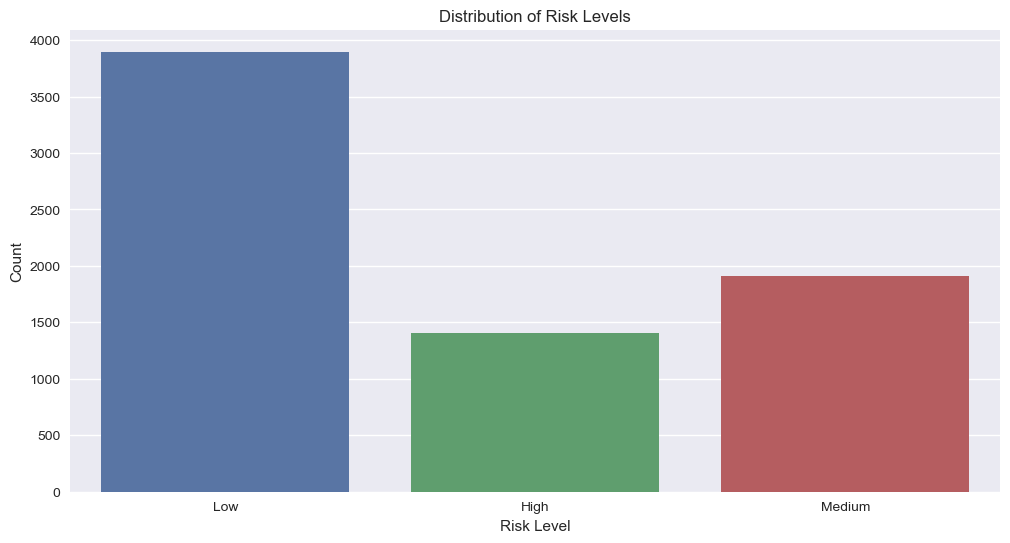

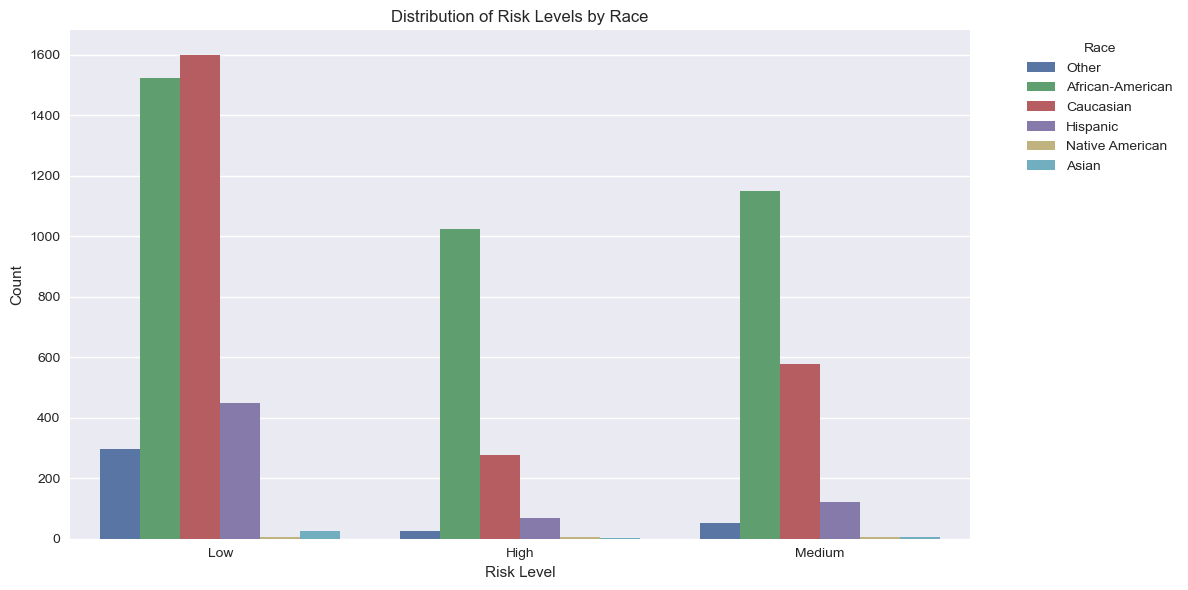

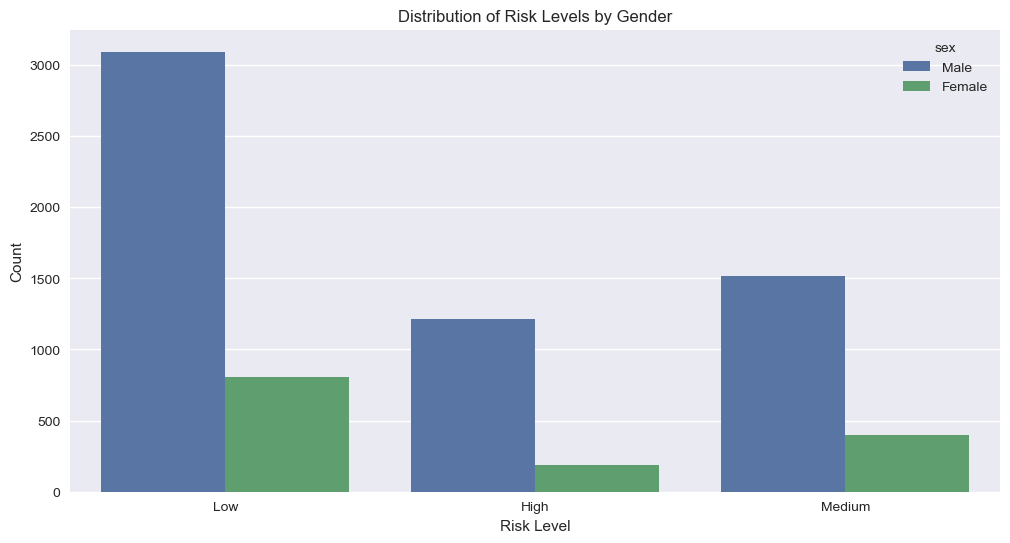

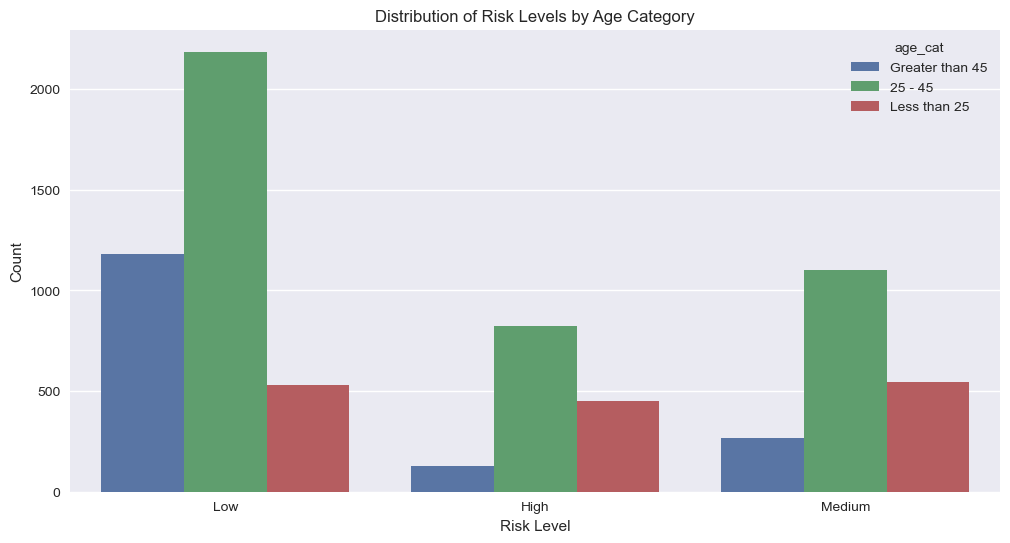

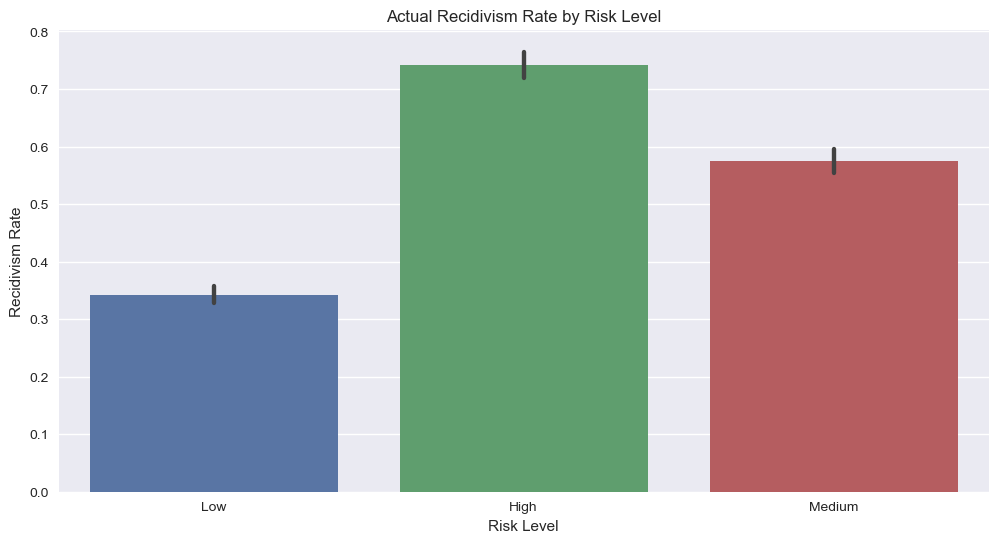

In [25]:
# Basic count of risk levels
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='score_text')
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# Risk levels by race
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='score_text', hue='race')
plt.title('Distribution of Risk Levels by Race')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Risk levels by gender
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='score_text', hue='sex')
plt.title('Distribution of Risk Levels by Gender')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# Risk levels by age category
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='score_text', hue='age_cat')
plt.title('Distribution of Risk Levels by Age Category')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# Actual recidivism by risk level
plt.figure(figsize=fig_size)
sns.barplot(data=df, x='score_text', y='is_recid')
plt.title('Actual Recidivism Rate by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Recidivism Rate')
plt.show()

C:\Users\fsd_n\AppData\Local\Temp\ipykernel_18032\1831244396.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


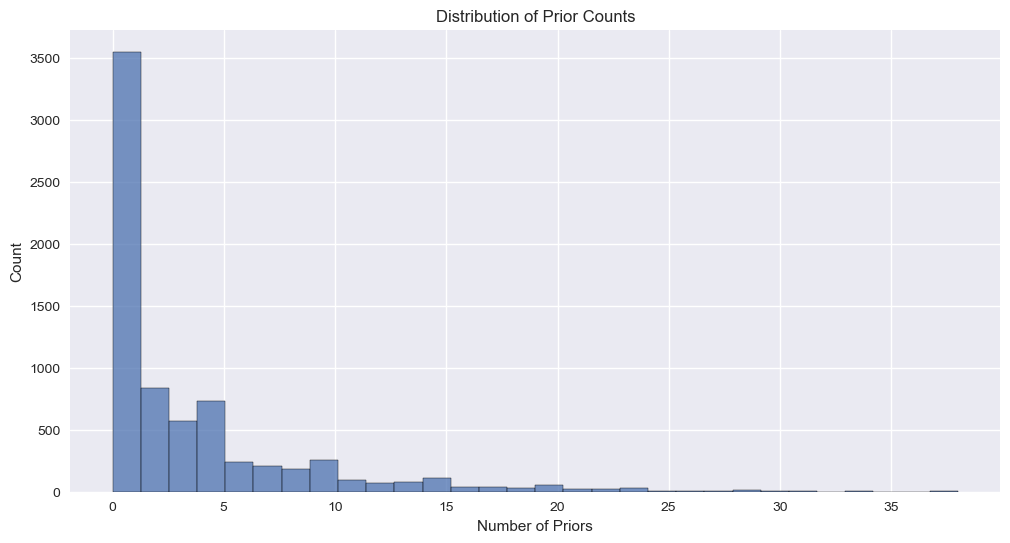

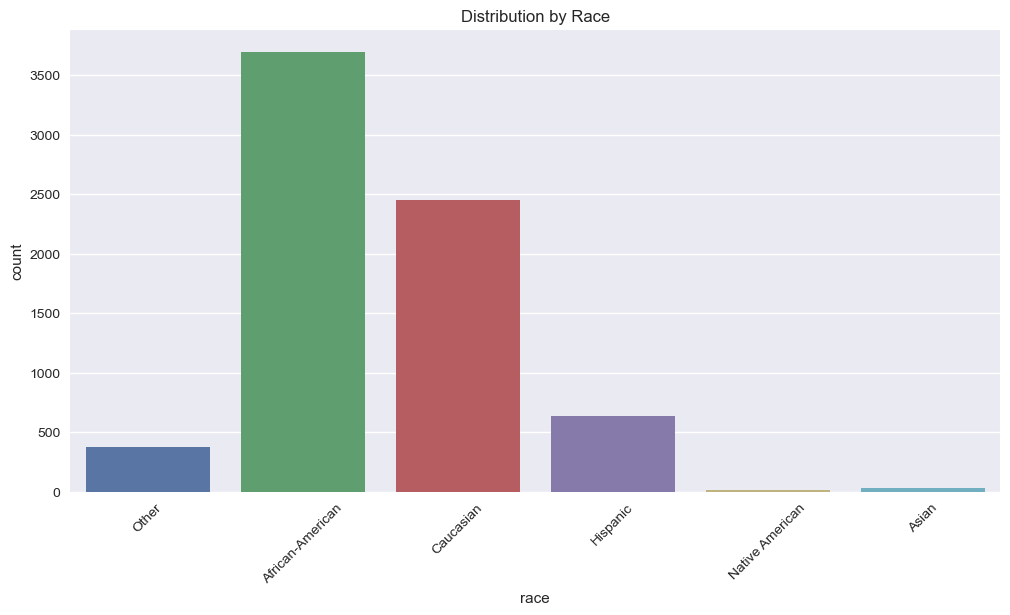

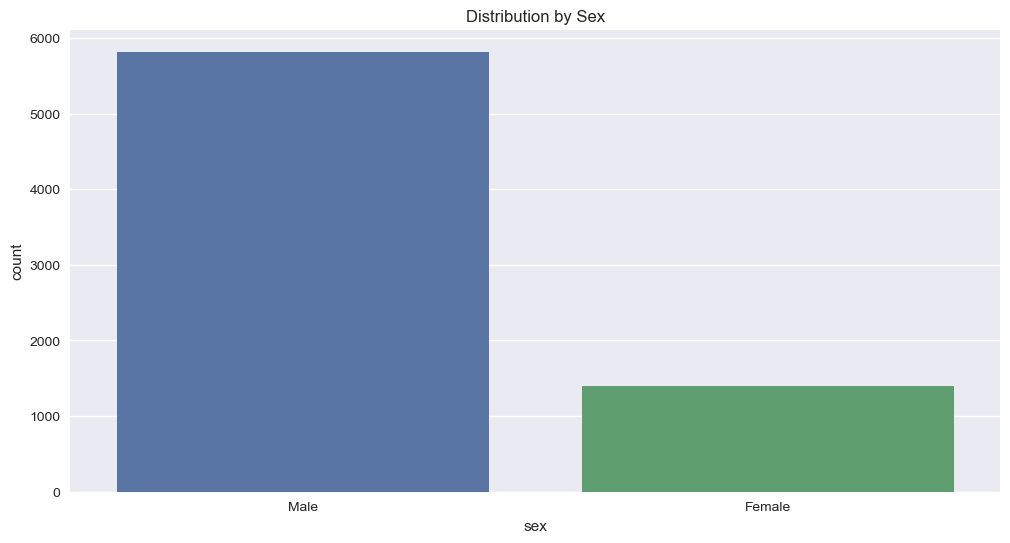

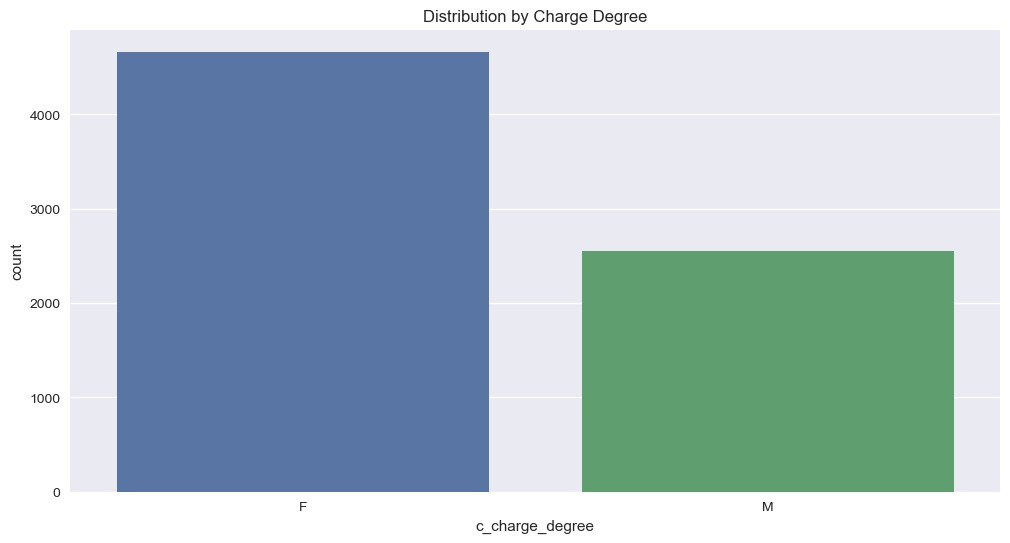

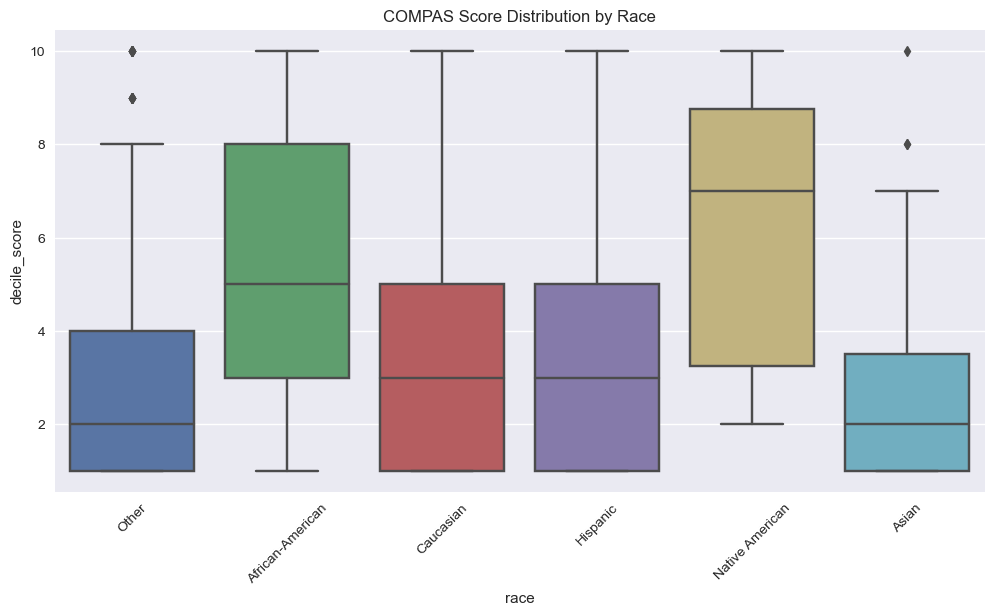

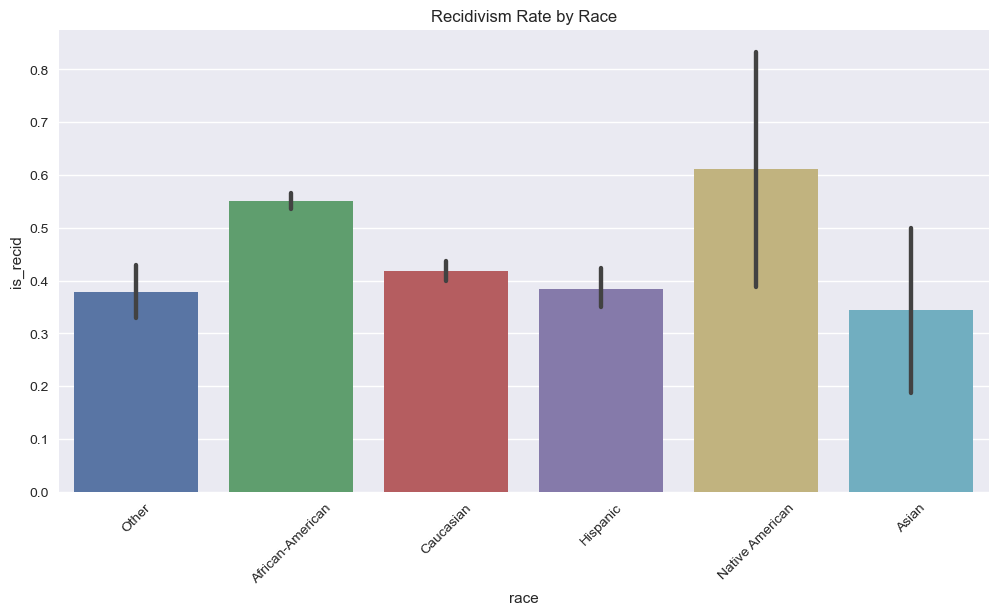

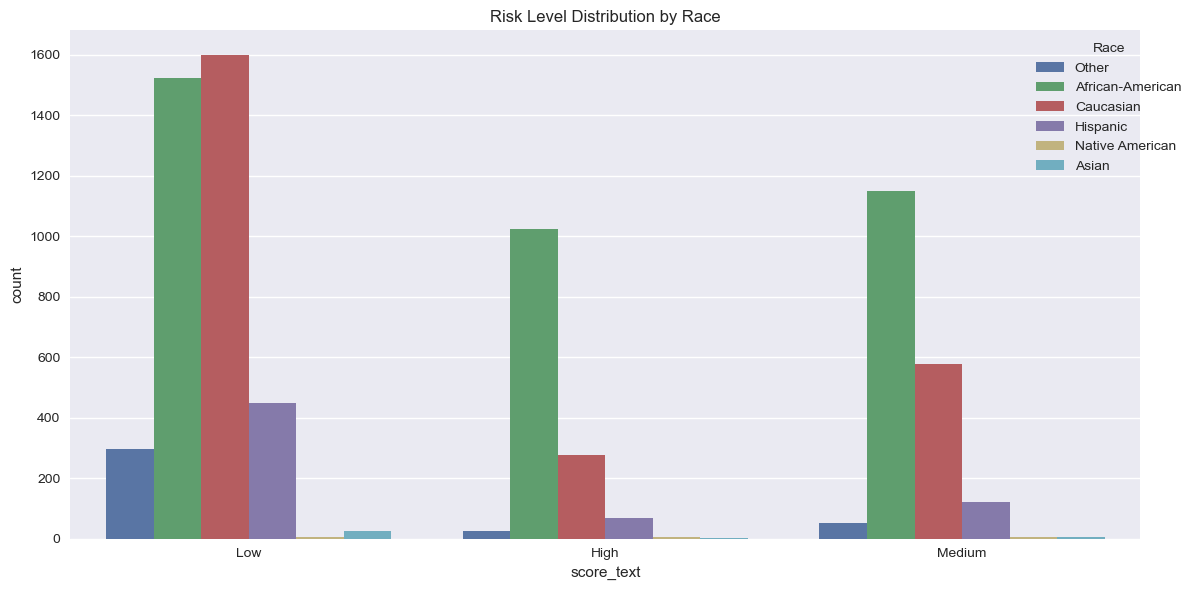

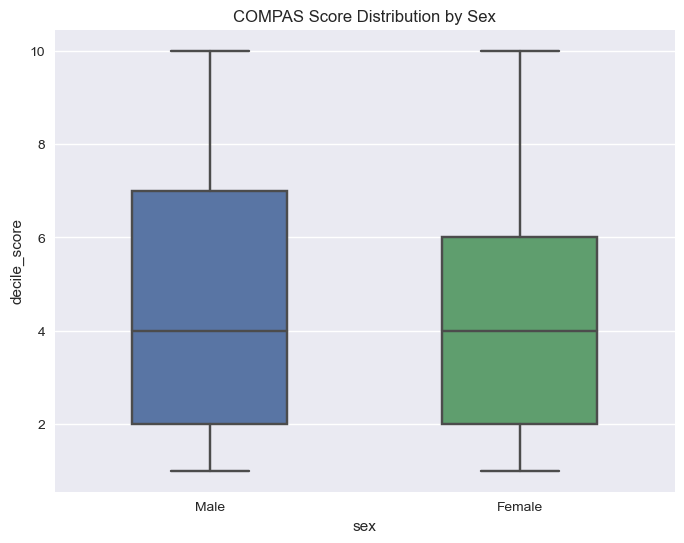

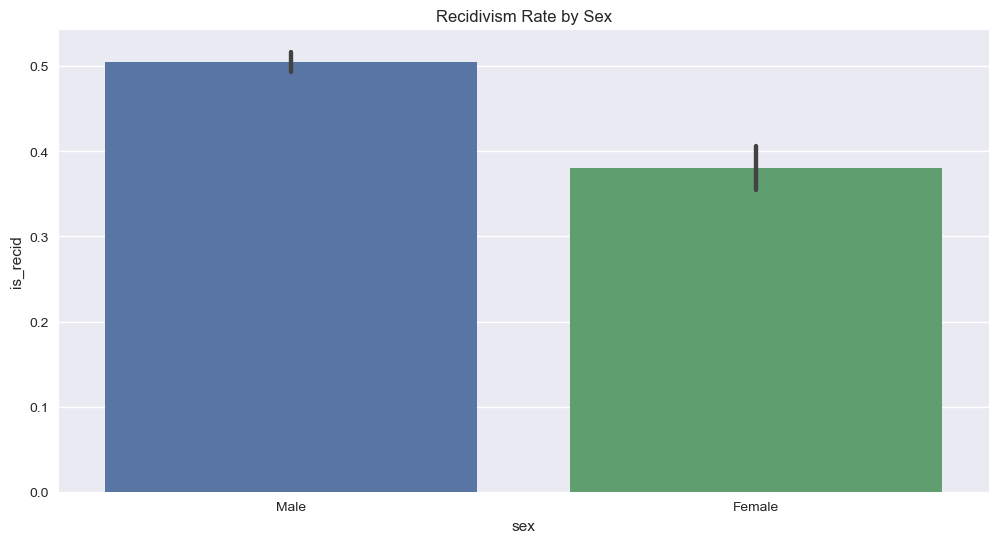

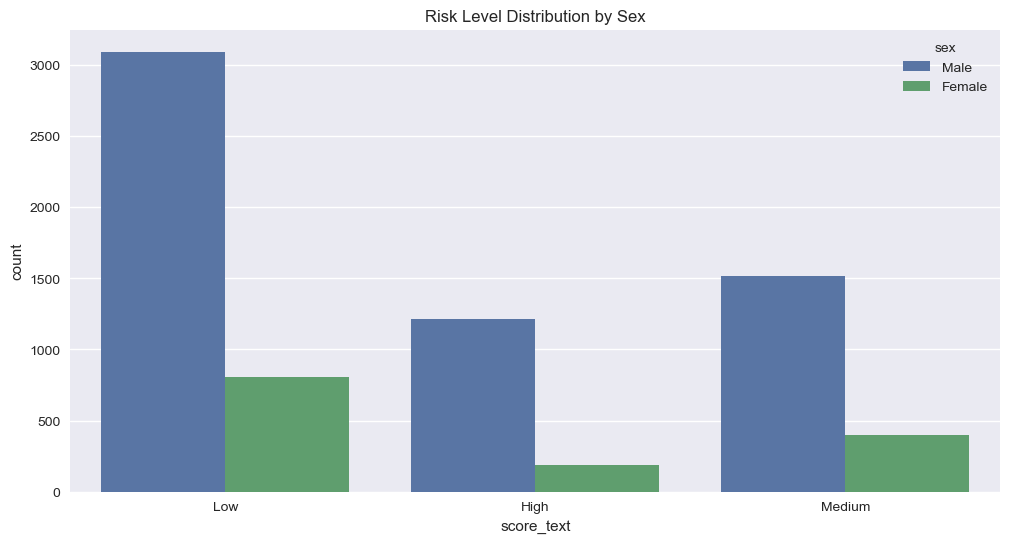

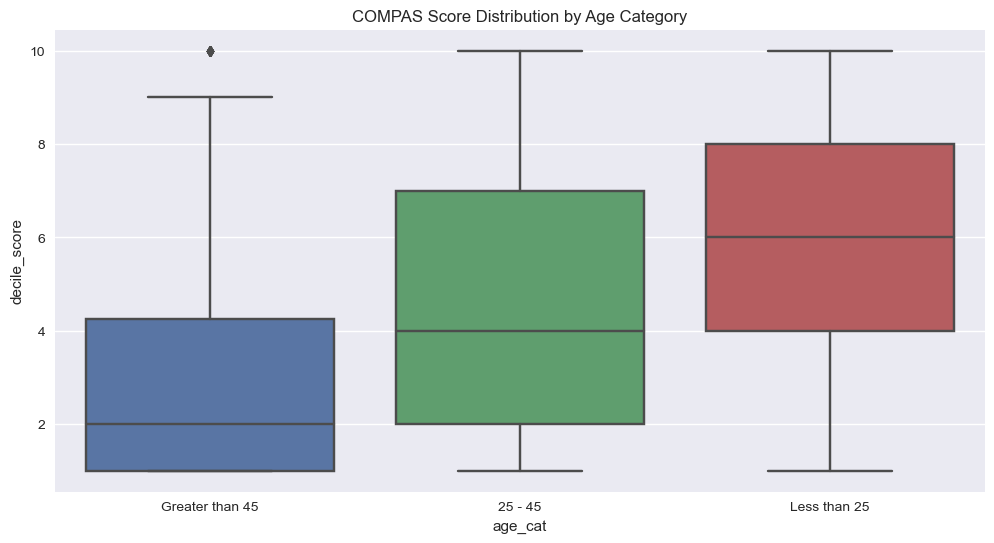

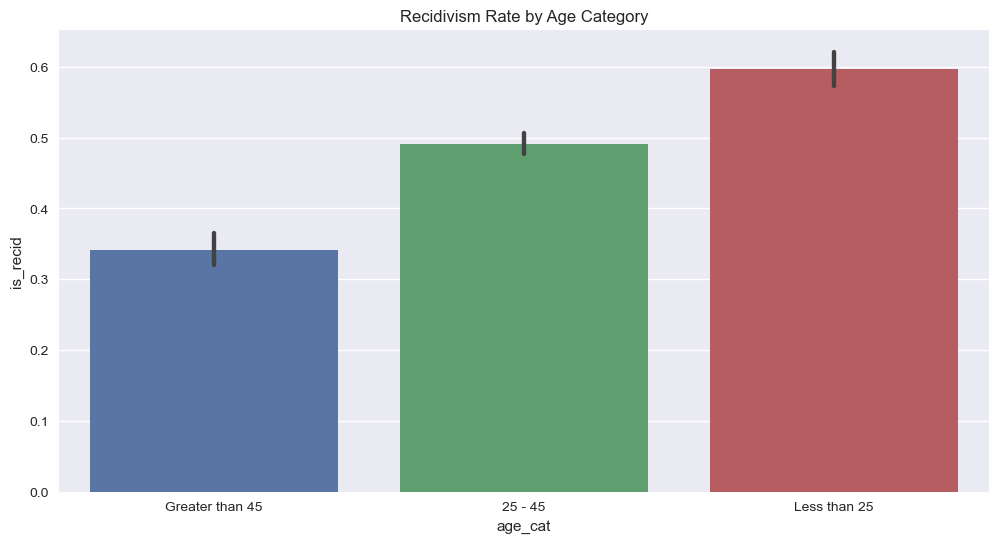

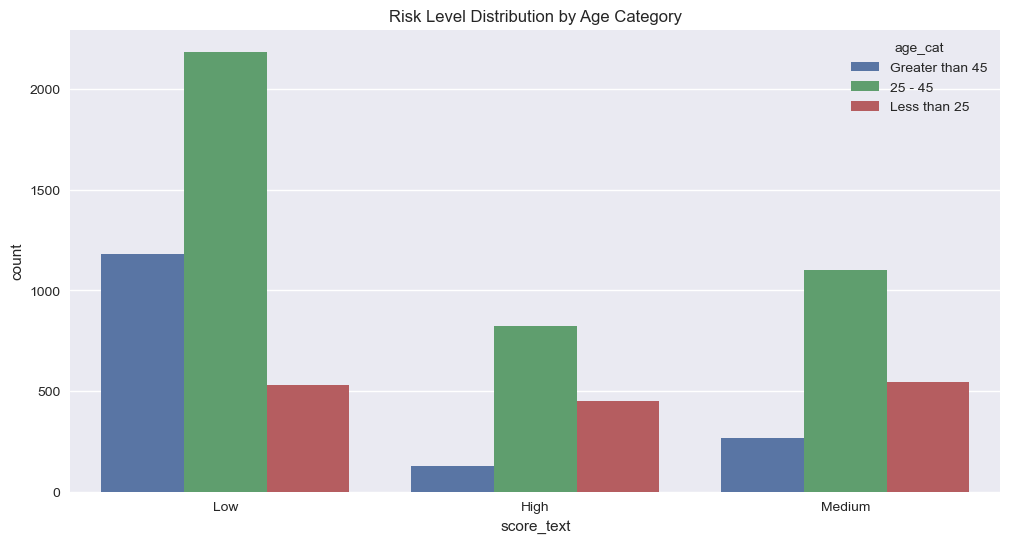

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and figure size
plt.style.use('seaborn')
fig_size = (12, 6)

# Distribution Plots
# 1. Prior count distribution
plt.figure(figsize=fig_size)
sns.histplot(data=df, x='priors_count', bins=30)
plt.title('Distribution of Prior Counts')
plt.xlabel('Number of Priors')
plt.show()

# 2. Race count comparison
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='race')
plt.title('Distribution by Race')
plt.xticks(rotation=45)
plt.show()

# 3. Sex count comparison
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='sex')
plt.title('Distribution by Sex')
plt.show()

# 4. Charge degree plot
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='c_charge_degree')
plt.title('Distribution by Charge Degree')
plt.show()

# Difference Plots
# Race comparisons
plt.figure(figsize=fig_size)
sns.boxplot(data=df, x='race', y='decile_score')
plt.title('COMPAS Score Distribution by Race')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=fig_size)
sns.barplot(data=df, x='race', y='is_recid')
plt.title('Recidivism Rate by Race')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=fig_size)
sns.countplot(data=df, x='score_text', hue='race')
plt.title('Risk Level Distribution by Race')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Sex comparisons
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='sex', y='decile_score', width=0.5)
plt.title('COMPAS Score Distribution by Sex')
plt.show()

plt.figure(figsize=fig_size)
sns.barplot(data=df, x='sex', y='is_recid')
plt.title('Recidivism Rate by Sex')
plt.show()

plt.figure(figsize=fig_size)
sns.countplot(data=df, x='score_text', hue='sex')
plt.title('Risk Level Distribution by Sex')
plt.show()

# Age category comparisons
plt.figure(figsize=fig_size)
sns.boxplot(data=df, x='age_cat', y='decile_score')
plt.title('COMPAS Score Distribution by Age Category')
plt.show()

plt.figure(figsize=fig_size)
sns.barplot(data=df, x='age_cat', y='is_recid')
plt.title('Recidivism Rate by Age Category')
plt.show()

plt.figure(figsize=fig_size)
sns.countplot(data=df, x='score_text', hue='age_cat')
plt.title('Risk Level Distribution by Age Category')
plt.show()

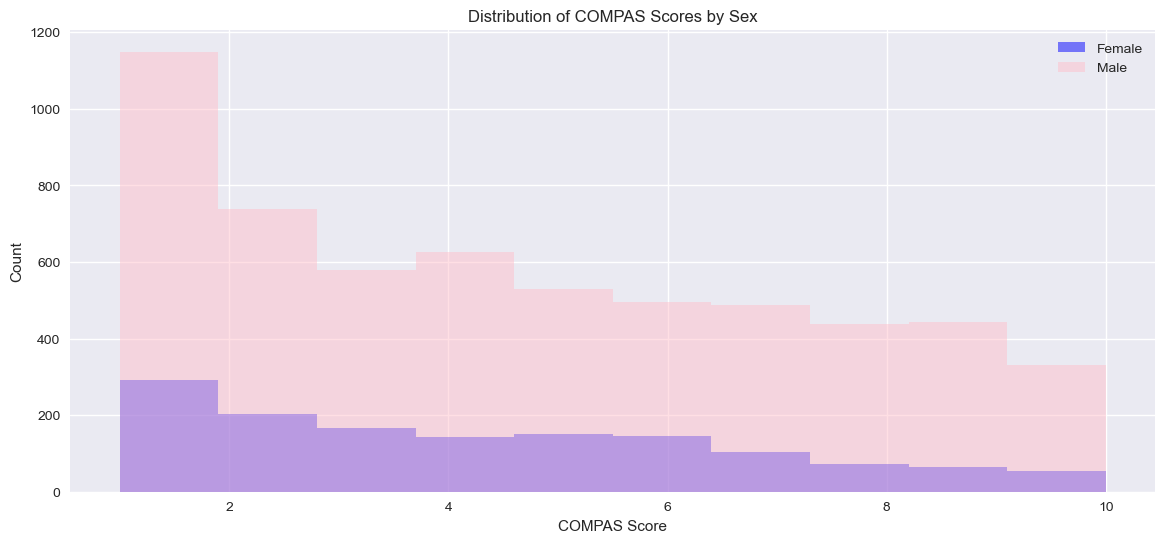

In [21]:
# Create figure and axis objects
plt.figure(figsize=(14,6))

# Plot histograms for each gender with custom colors
for gender, color in zip(['Female', 'Male'], ['blue', 'pink']):
    df[df['sex'] == gender]['decile_score'].hist(
        alpha=0.5, 
        label=gender, 
        color=color,
        bins=10
    )

plt.title('Distribution of COMPAS Scores by Sex')
plt.xlabel('COMPAS Score')
plt.ylabel('Count')
plt.legend()
plt.show()